In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [76]:
# Fetching dataset - 1
df1 = pd.read_csv("C:\\Users\\HP\\Downloads\\archive (6)\\final_dataset.csv")
df1.head()

,Unnamed: 0,State Name,Two Wheeler,Three Wheeler,Four Wheeler,Goods Vehicles,Public Service Vehicle,Special Category Vehicles,Ambulance/Hearses,Construction Equipment Vehicle,Other,Grand Total,total-charging-stations
0,0,Andaman and Nicobar Island,1,30.0,81,0.0,40.0,0.0,0.0,0.0,7.0,159,NaN
1,1,Arunachal Pradesh,14,0.0,5,0.0,0.0,0.0,0.0,0.0,1.0,20,NaN
2,2,Assam,721,47041.0,161,7.0,15.0,0.0,0.0,0.0,2.0,47947,10.0
3,3,Bihar,5003,59079.0,114,11.0,26.0,0.0,0.0,0.0,8.0,64241,9.0
4,4,Chandigarh,298,1410.0,182,0.0,40.0,0.0,0.0,0.0,1.0,1931,2.0


In [77]:
# Fetching dataset - 2
df2 = pd.read_csv('C:\\Users\\HP\\Downloads\\electric_vehicle_charging_station_list.csv')
df2.head()

,no,region,address,aux addres,latitude,longitude,type,power,service
0,1,NDMC,"Prithviraj Market, Rabindra Nagar, New Delhi- ...","Electric Vehicle Charger, Prithviraj Market, R...",28.600725,77.226252,DC-001,15 kW,Self Service
1,2,NDMC,"Prithviraj Market, Rabindra Nagar, New Delhi- ...","Electric Vehicle Charger, Prithviraj Market, R...",28.600725,77.226252,DC-001,15 kW,Self Service
2,3,NDMC,"Outside RWA Park, Jor Bagh Market, Jor Bagh Co...","Electric Vehicle Charger, Outside RWA Park, Jo...",28.588303,77.217697,DC-001,15 kW,Self Service
3,4,NDMC,"Opposite Dory Pharmacy, Khanna Market, Aliganj...","Electric Vehicle Charger, Opposite Dory Pharma...",28.582654,77.220087,DC-001,15 kW,Self Service
4,5,NDMC,"Opposite Goel Opticals, Khanna Market, Aliganj...","Electric Vehicle Charger, Opposite Goel Optica...",28.584485,77.220316,DC-001,15 kW,Self Service


In [78]:
# checking the shape (# of rows and columns) of the datasets
print('DF1 Shape: ', df1.shape)
print('DF2 Shape: ', df2.shape)


DF1 Shape:  (32, 13)
DF2 Shape:  (202, 9)


In [79]:
# checking the info (columns, datatypes, nulls) of the datasets
print('DATASET 1 ')
print(df1.info())
print('DATASET 2 ')
print(df2.info())


DATASET 1 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      32 non-null     int64  
 1   State Name                      32 non-null     object 
 2   Two Wheeler                     32 non-null     int64  
 3   Three Wheeler                   32 non-null     float64
 4   Four Wheeler                    32 non-null     int64  
 5   Goods Vehicles                  32 non-null     float64
 6   Public Service Vehicle          32 non-null     float64
 7   Special Category Vehicles       32 non-null     float64
 8   Ambulance/Hearses               32 non-null     float64
 9   Construction Equipment Vehicle  32 non-null     float64
 10  Other                           32 non-null     float64
 11  Grand Total                     32 non-null     int64  
 12  total-charging-stations    

In [80]:
# getting a statistical summary of the datasets
d1 = df1.describe()
d2 = df2.describe()

display(' DATASET 1 ', d1, ' DATASET 2 ', d2 )

' DATASET 1 '

,Unnamed: 0,Two Wheeler,Three Wheeler,Four Wheeler,Goods Vehicles,Public Service Vehicle,Special Category Vehicles,Ambulance/Hearses,Construction Equipment Vehicle,Other,Grand Total,total-charging-stations
count,32.000000,32.000000,32.000000,32.00000,32.000000,32.000000,32.00000,32.000000,32.000000,32.000000,32.000000,24.000000
mean,15.500000,8829.437500,20224.562500,822.96875,94.875000,63.718750,12.81250,0.187500,12.406250,137.875000,30198.843750,57.666667
std,9.380832,15027.420445,49311.798762,1661.50339,287.596912,161.503467,60.76047,0.470929,65.050283,377.119879,54220.859227,69.800752
min,0.000000,1.000000,0.000000,2.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,20.000000,1.000000
25%,7.750000,68.500000,31.500000,13.75000,1.750000,0.750000,0.00000,0.000000,0.000000,1.000000,1323.000000,7.750000
50%,15.500000,1984.500000,1992.000000,131.50000,10.000000,12.500000,0.00000,0.000000,0.000000,11.000000,11156.500000,25.000000
75%,23.250000,10306.500000,17007.250000,638.50000,31.250000,40.000000,1.00000,0.000000,0.000000,58.000000,45205.000000,80.250000
max,31.000000,56737.000000,257159.000000,7212.00000,1281.000000,851.000000,344.00000,2.000000,368.000000,1602.000000,276217.000000,265.000000


' DATASET 2 '

,no,latitude,longitude
count,202.000000,202.000000,202.000000
mean,101.500000,25.960987,78.418002
std,58.456537,5.616108,3.097664
min,1.000000,8.481051,76.277781
25%,51.250000,28.535516,77.212996
50%,101.500000,28.580286,77.226252
75%,151.750000,28.617783,77.375216
max,202.000000,28.642892,88.509064


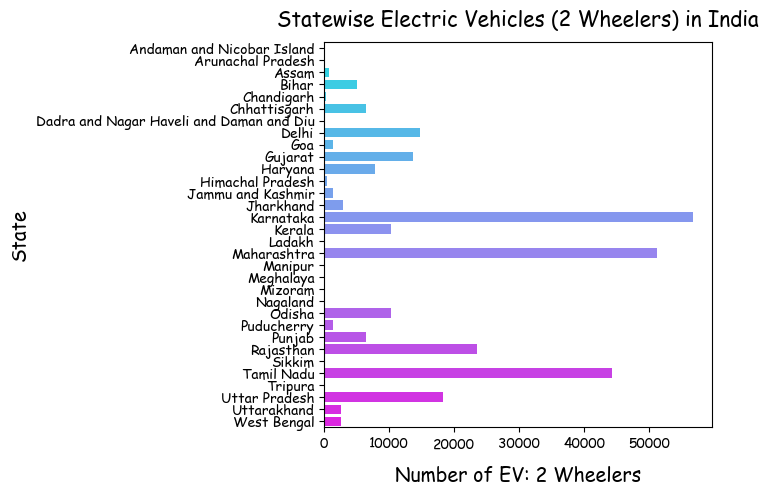

In [81]:
# 2 wheelers data visualization from dataset 1
plt.figure(figsize=(5,5))
sns.barplot(data=df1, y=df1['State Name'].sort_values(ascending=True), x='Two Wheeler', palette='cool')
plt.ylabel('State', fontsize=14, family='fantasy')
plt.xlabel('Number of EV: 2 Wheelers', family='fantasy', fontsize=14, labelpad=10)
plt.xticks(family='fantasy')
plt.yticks(family='fantasy')
plt.title(label='Statewise Electric Vehicles (2 Wheelers) in India', weight=200, family='fantasy', size=15, pad=12)
plt.show()

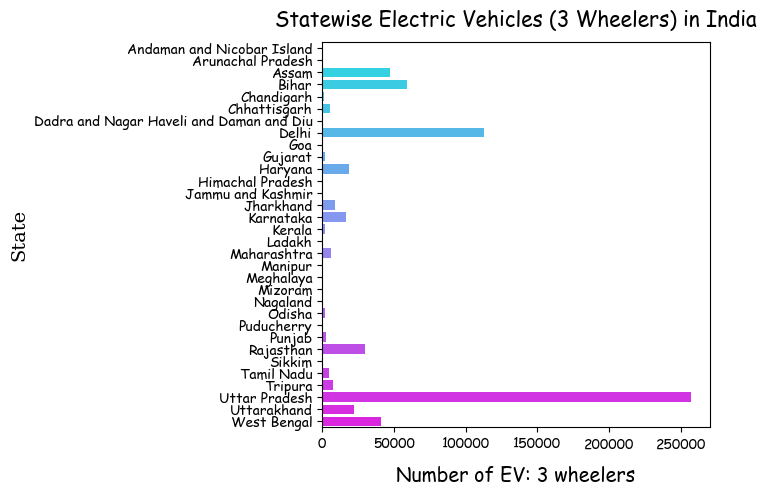

In [82]:
# 3 wheelers data visualization from dataset 1
plt.figure(figsize=(5,5))
sns.barplot(data=df1, y=df1['State Name'].sort_values(ascending=True), x='Three Wheeler', palette='cool')
plt.ylabel('State', fontsize=14, family='serif')
plt.xlabel('Number of EV: 3 wheelers', family='fantasy', fontsize=14, labelpad=10)
plt.xticks(family='fantasy')
plt.yticks(family='fantasy')
plt.title(label='Statewise Electric Vehicles (3 Wheelers) in India', weight=200, family='fantasy', size=15, pad=12)
plt.show()

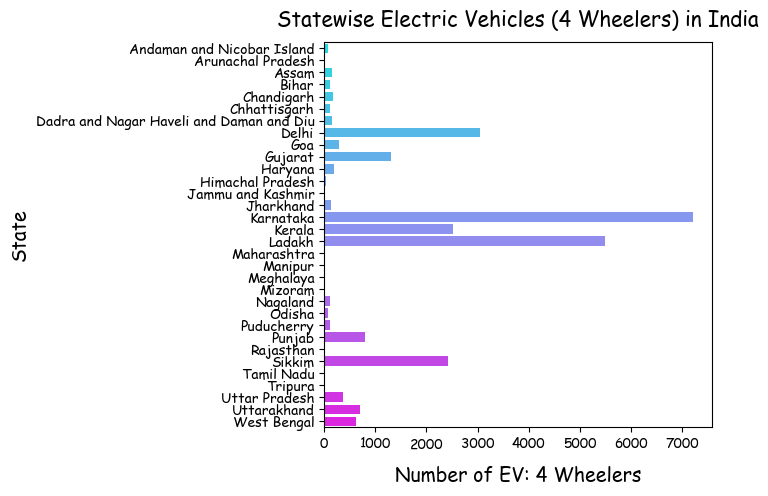

In [83]:
# 4 wheelers data visualization from dataset 1
plt.figure(figsize=(5,5))
sns.barplot(data=df1, y=df1['State Name'].sort_values(ascending=True), x='Four Wheeler', palette='cool')
plt.ylabel('State', fontsize=14, family='fantasy')
plt.xlabel('Number of EV: 4 Wheelers', family='fantasy', fontsize=14, labelpad=10)
plt.xticks(family='fantasy')
plt.yticks(family='fantasy')
plt.title(label='Statewise Electric Vehicles (4 Wheelers) in India', weight=200, family='fantasy', size=15, pad=12)
plt.show()

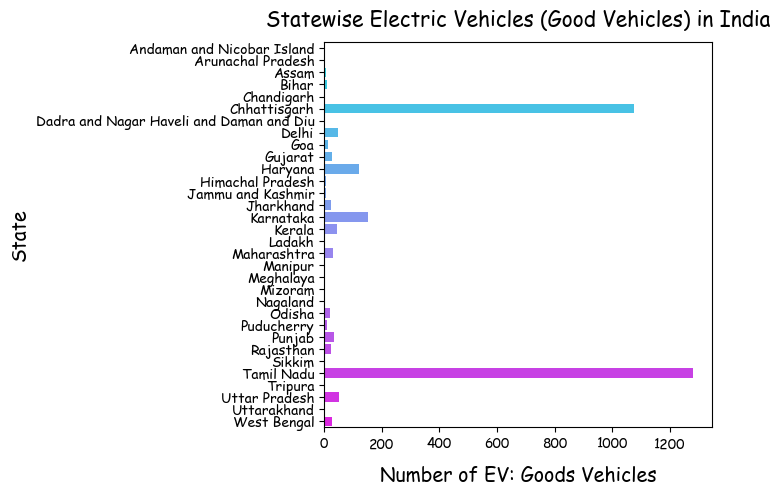

In [84]:
# Goods Vehicles data visualization from dataset 1
plt.figure(figsize=(5,5))
sns.barplot(data=df1, y=df1['State Name'].sort_values(ascending=True), x='Goods Vehicles', palette='cool')
plt.ylabel('State', fontsize=14, family='fantasy')
plt.xlabel('Number of EV: Goods Vehicles', family='fantasy', fontsize=14, labelpad=10)
plt.xticks(family='fantasy')
plt.yticks(family='fantasy')
plt.title(label='Statewise Electric Vehicles (Good Vehicles) in India', weight=200, family='fantasy', size=15, pad=12)
plt.show()

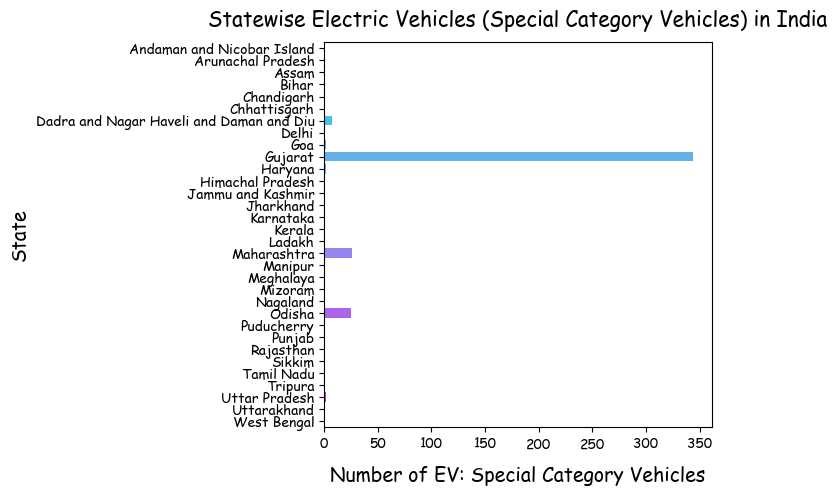

In [85]:
# Special Category Vehicles data visualization from dataset 1
plt.figure(figsize=(5,5))
sns.barplot(data=df1, y=df1['State Name'].sort_values(ascending=True), x='Special Category Vehicles', palette='cool')
plt.ylabel('State', fontsize=14, family='fantasy')
plt.xlabel('Number of EV: Special Category Vehicles', family='fantasy', fontsize=14, labelpad=10)
plt.xticks(family='fantasy')
plt.yticks(family='fantasy')
plt.title(label='Statewise Electric Vehicles (Special Category Vehicles) in India', weight=200, family='fantasy', size=15, pad=12)
plt.show()

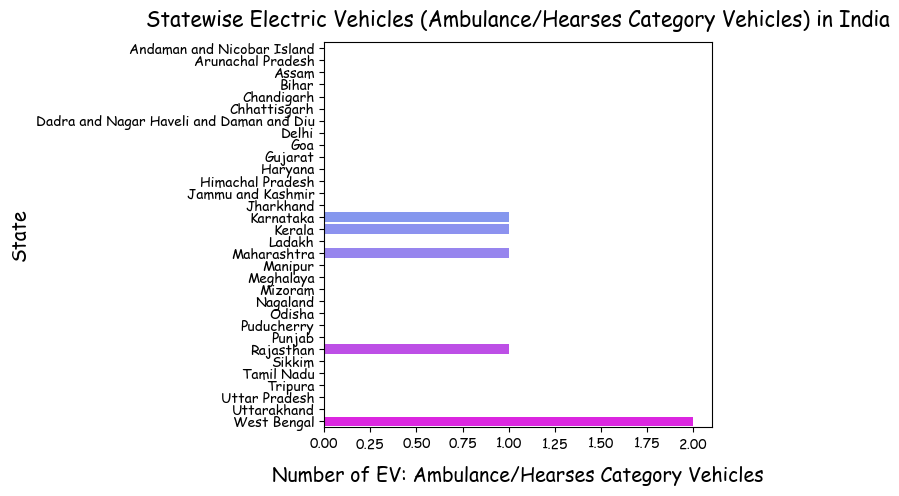

In [86]:
# Ambulance/Hearses Category Vehicles data visualization from dataset 1
plt.figure(figsize=(5,5))
sns.barplot(data=df1, y=df1['State Name'].sort_values(ascending=True), x='Ambulance/Hearses', palette='cool')
plt.ylabel('State', fontsize=14, family='fantasy')
plt.xlabel('Number of EV: Ambulance/Hearses Category Vehicles', family='fantasy', fontsize=14, labelpad=10)
plt.xticks(family='fantasy')
plt.yticks(family='fantasy')
plt.title(label='Statewise Electric Vehicles (Ambulance/Hearses Category Vehicles) in India', weight=200, family='fantasy', size=15, pad=12)
plt.show()

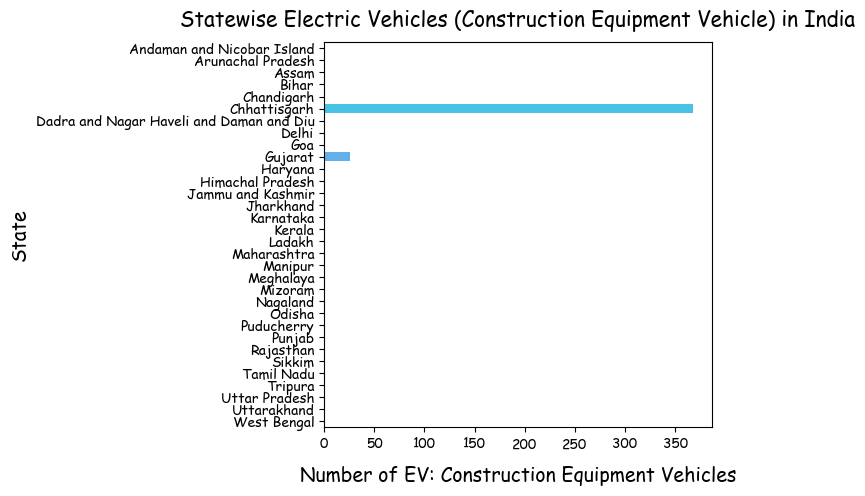

In [87]:
# Construction Equipment Vehicles data visualization from dataset 1
plt.figure(figsize=(5,5))
sns.barplot(data=df1, y=df1['State Name'].sort_values(ascending=True), x='Construction Equipment Vehicle', palette='cool')
plt.ylabel('State', fontsize=14, family='fantasy')
plt.xlabel('Number of EV: Construction Equipment Vehicles', family='fantasy', fontsize=14, labelpad=10)
plt.xticks(family='fantasy')
plt.yticks(family='fantasy')
plt.title(label='Statewise Electric Vehicles (Construction Equipment Vehicle) in India', weight=200, family='fantasy', size=15, pad=12)
plt.show()

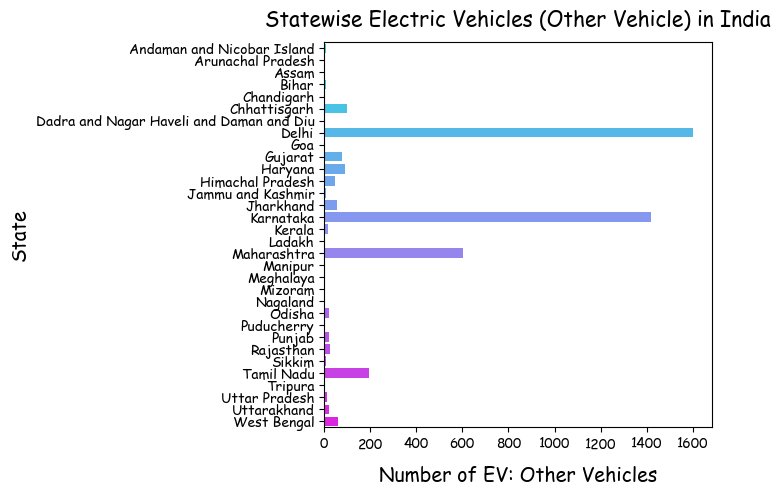

In [88]:
# Other Vehicles data visualization from dataset 1
plt.figure(figsize=(5,5))
sns.barplot(data=df1, y=df1['State Name'].sort_values(ascending=True), x='Other', palette='cool')
plt.ylabel('State', fontsize=14, family='fantasy')
plt.xlabel('Number of EV: Other Vehicles', family='fantasy', fontsize=14, labelpad=10)
plt.xticks(family='fantasy')
plt.yticks(family='fantasy')
plt.title(label='Statewise Electric Vehicles (Other Vehicle) in India', weight=200, family='fantasy', size=15, pad=12)
plt.show()

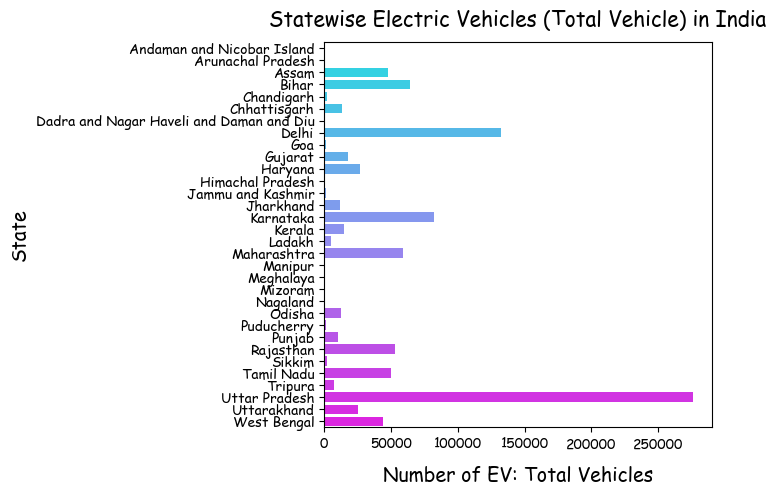

In [89]:
# Total Vehicles data visualization from dataset 1
plt.figure(figsize=(5,5))
sns.barplot(data=df1, y=df1['State Name'].sort_values(ascending=True), x='Grand Total', palette='cool')
plt.ylabel('State', fontsize=14, family='fantasy')
plt.xlabel('Number of EV: Total Vehicles', family='fantasy', fontsize=14, labelpad=10)
plt.xticks(family='fantasy')
plt.yticks(family='fantasy')
plt.title(label='Statewise Electric Vehicles (Total Vehicle) in India', weight=200, family='fantasy', size=15, pad=12)
plt.show()

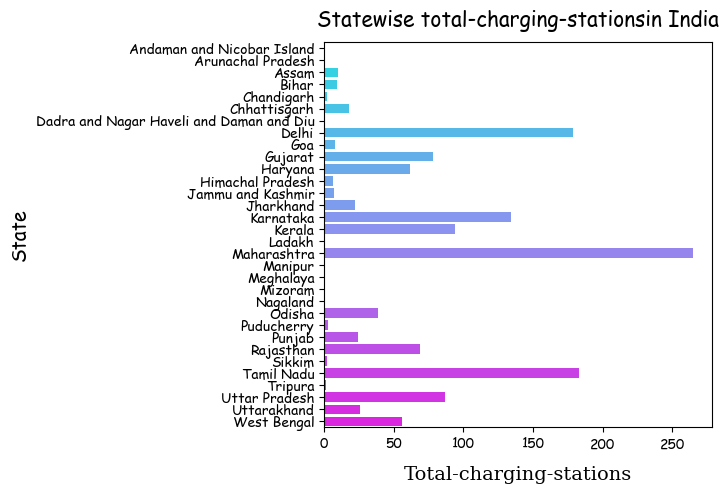

In [90]:
# total-charging-stations data visualization from dataset 1
plt.figure(figsize=(5,5))
sns.barplot(data=df1, y=df1['State Name'].sort_values(ascending=True), x='total-charging-stations', palette='cool')
plt.ylabel('State', fontsize=14, family='fantasy')
plt.xlabel('Total-charging-stations', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='fantasy')
plt.yticks(family='fantasy')
plt.title(label='Statewise total-charging-stationsin India', weight=200, family='fantasy', size=15, pad=12)
plt.show()

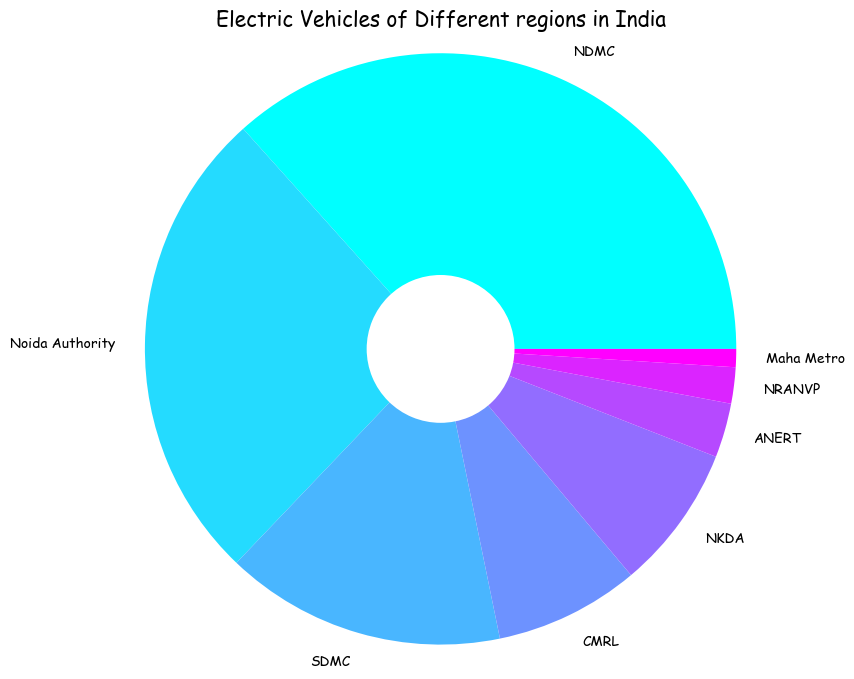

In [91]:
# different region EVs visualization from dataset 2
x = df2['region'].value_counts().plot.pie(radius=2, cmap='cool', startangle=0, textprops=dict(family='fantasy'))
plt.pie(x=[1], radius=0.5, colors='white')
plt.title(label='Electric Vehicles of Different regions in India', family='fantasy', size=15, pad=100)
plt.ylabel('')
plt.show()

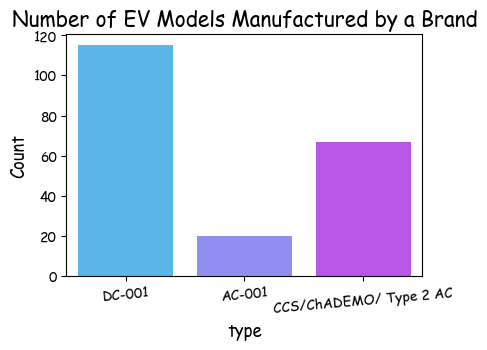

In [92]:
# type-wise count of EV models
sns.catplot(data=df2, x='type', kind='count', palette='cool', height=3, aspect=1.5)
sns.despine(right=False, top=False)
plt.tick_params(axis='x', rotation=5)
plt.xlabel('type',family='fantasy', size=12)
plt.ylabel('Count', family='fantasy', size=12)
plt.xticks(family='fantasy')
plt.yticks(family='fantasy')
plt.title('Number of EV Models Manufactured by a Brand', family='fantasy', size=15)
plt.show()

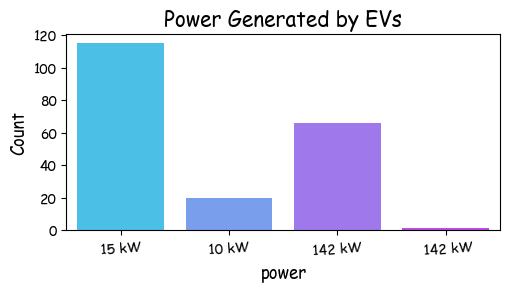

In [93]:
# power-wise count of EV models
sns.catplot(data=df2, x='power', kind='count', palette='cool', height=2.5, aspect=2)
sns.despine(right=False, top=False)
plt.tick_params(axis='x', rotation=5)
plt.xlabel('power',family='fantasy', size=12)
plt.ylabel('Count', family='fantasy', size=12)
plt.xticks(family='fantasy')
plt.yticks(family='fantasy')
plt.title('Power Generated by EVs', family='fantasy', size=15)
plt.show()

In [94]:
from mpl_toolkits.basemap import Basemap

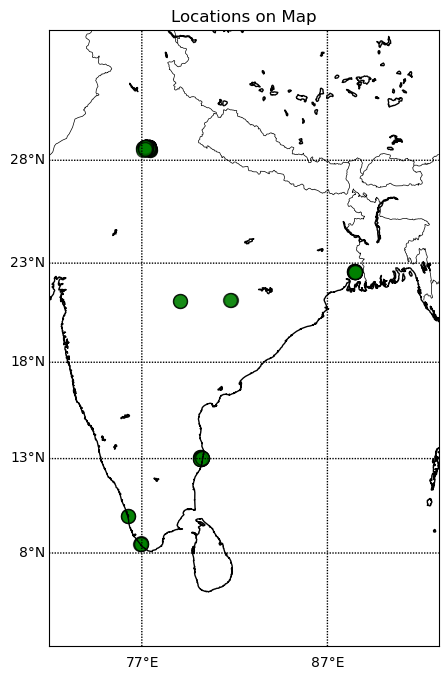

In [95]:
plt.figure(figsize=(12, 8))
m = Basemap(projection='merc', llcrnrlat=3, urcrnrlat=34, llcrnrlon=72, urcrnrlon=93,resolution='i')
m.drawcoastlines()
m.drawcountries()
m.drawparallels(range(8,30,5), labels=[1,0,0,0])
m.drawmeridians(range(77,89, 10), labels=[0,0,0,1])
x, y = m(df2['longitude'].values, df2['latitude'].values)
m.scatter(x, y, c='green', marker='o', s=100, edgecolor='k', alpha=0.7)
plt.title('Locations on Map')
plt.show()

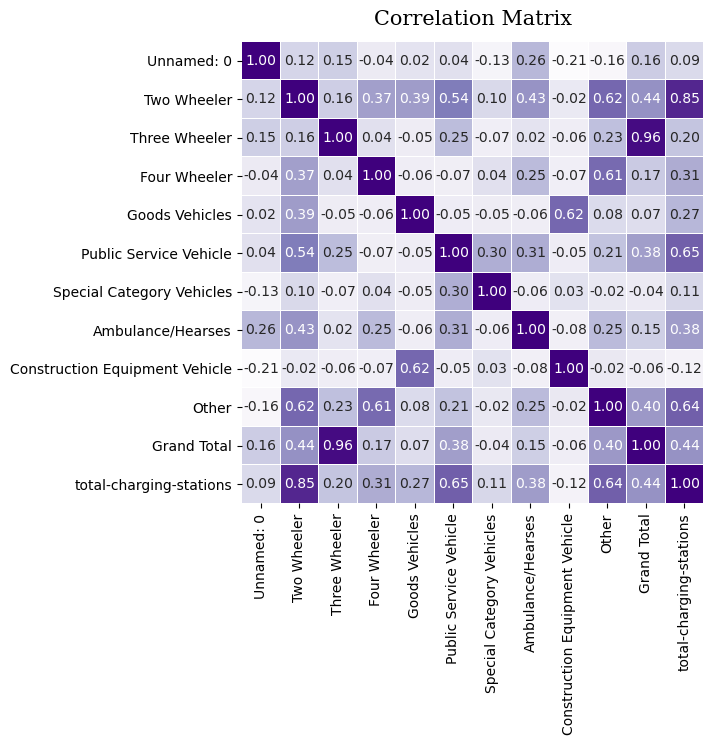

In [96]:
plt.figure(figsize=(6,6))
sns.heatmap(data=df1.corr(), annot=True, cmap='Purples', cbar=False, square=True, fmt='.2f', linewidths=.3)
plt.title('Correlation Matrix', family='serif', size=15, pad=12);
     


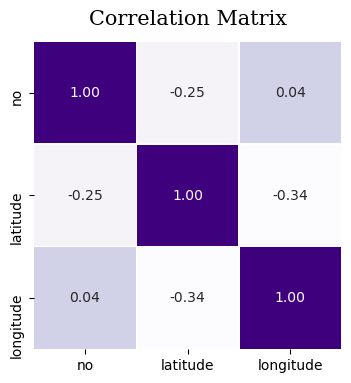

In [97]:
plt.figure(figsize=(4,4))
sns.heatmap(data=df2.corr(), annot=True, cmap='Purples', cbar=False, square=True, fmt='.2f', linewidths=.3)
plt.title('Correlation Matrix', family='serif', size=15, pad=12);

In [98]:
df2['power'] = df2['power'].apply(lambda x: float(x.split()[0]))

In [99]:
X = df2[['latitude', 'longitude', 'power']]
     

In [100]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [101]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])
df_pca.head()

,PC1,PC2,PC3
0,-0.244974,-0.847749,0.266276
1,-0.244974,-0.847749,0.266276
2,-0.245607,-0.846562,0.269558
3,-0.244485,-0.845964,0.269587
4,-0.244624,-0.846149,0.269344


c:\users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


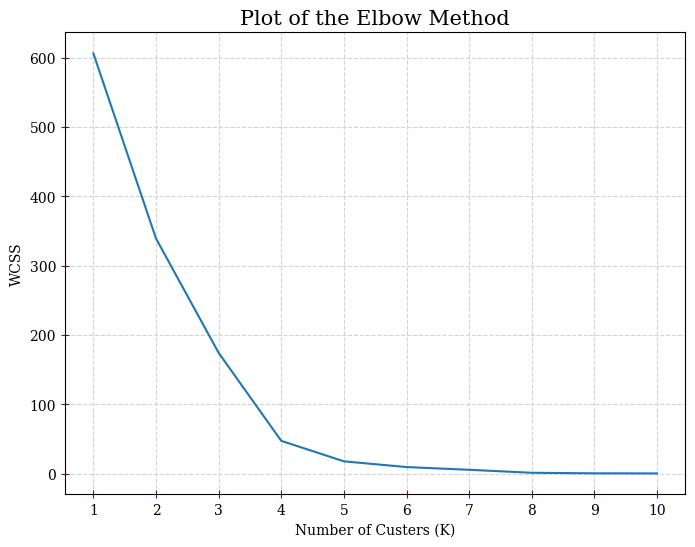

In [102]:
wcss = []

for i in range(1, 11):
  kmean = KMeans(n_clusters=i, init='k-means++', random_state=90)
  kmean.fit(X_pca)
  wcss.append(kmean.inertia_)

plt.figure(figsize=(8,6))
plt.title('Plot of the Elbow Method', size=15, family='serif')
plt.plot(range(1, 11), wcss)
plt.xticks(range(1, 11), family='serif')
plt.yticks(family='serif')
plt.xlabel('Number of Custers (K)', family='serif')
plt.ylabel('WCSS', family='serif')
plt.grid()
plt.tick_params(axis='both', direction='inout', length=6, color='purple', grid_color='lightgray', grid_linestyle='--')
plt.show()

In [103]:
kmean = KMeans(n_clusters=5, init='k-means++', random_state=90)
kmean.fit(X_pca)

KMeans(n_clusters=5, random_state=90)

In [104]:
print(kmean.labels_)
     

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 2 2 2 2 2 2 2 2 3 3
 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2 0 0 0 0 0 0 0 2 2 2 2 0 0 2 2 0 0 2 2 2 2
 2 2 2 1 1 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 0 0 0 2 2
 1 1 0 0 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 4 4 4 4 4 4 0 0 0 0 0 0 0 0 0 0 0
 0 0 4 4 1 1 2 2 3 3 3 3 4 1 1 1 2]


In [105]:
pd.Series(kmean.labels_).value_counts()

2    100
0     58
1     19
3     16
4      9
dtype: int64

In [106]:
df2['clusters'] = kmean.labels_

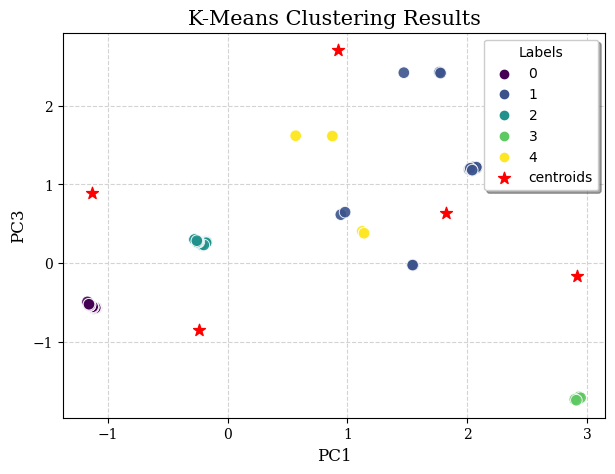

In [107]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df_pca, x='PC1', y='PC3', s=70, hue=kmean.labels_, palette='viridis', zorder=2, alpha=.9)
plt.scatter(x=kmean.cluster_centers_[:,0], y=kmean.cluster_centers_[:,1], marker="*", c="r", s=80, label="centroids")
plt.xlabel('PC1', family='serif', size=12)
plt.ylabel('PC3', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.grid()
plt.tick_params(grid_color='lightgray', grid_linestyle='--', zorder=1)
plt.legend(title='Labels', fancybox=True, shadow=True)
plt.title('K-Means Clustering Results', family='serif', size=15)
plt.show()